LDA is an unsupervised learning algorithm that discovers a blend of different themes or topics in a set of documents.

https://avinashnavlani.medium.com/latent-dirichlet-allocation-using-scikit-learn-b739cc7e0876

https://scikit-learn.org/stable/auto_examples/applications/plot_topics_extraction_with_nmf_lda.html#sphx-glr-auto-examples-applications-plot-topics-extraction-with-nmf-lda-py

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt

In [120]:
n_features = 15
n_topics = 2

In [165]:
data_samples = [
                "In a medium bowl, combine the orange juice, sugar, melted butter, egg, and orange zest.Transfer the batter to the prepared pan. Bake at 350°F for 50 to 55 minutes or until done (a tester inserted into the center comes out clean. Cool in the pan for 10 minutes. Remove from pan and cool on a wire rack.",
                "The company shares now trade for less than 13 times expected 2023 earnings, despite a five-year average ratio of 35.5. Between 2015 and 2023, PayPal's lowest price-to-earnings (P/E) ratio was 20.3.Applying that conservative multiple to its average expected 2023 earnings of $4.55 yields a price of $92.36 per share by early 2024, implying 58.6% upside from its Nov. 15 close at $58.25 per share being interesting for investors",
                "The company has faced several high-profile disputes this year; Florida Governor Ron DeSantis has been on a crusade against the company for publicly opposing anti-LGBTQ bills, and Charter Communications Inc. (CHTR) recently settled a dispute with Disney over carrier fees for its ESPN channel so investors should take care",
                "Melt the butter in a 10-inch Dutch oven or other heavy, deep pot over medium heat. Add the crushed crackers, black pepper, and kosher salt and stir to coat with the melted butter. Continue to toast over medium heat, stirring often, until golden brown, 2 to 4 minutes.",
                "Heat the oven to 180C/160C fan/gas 4. Oil and line the base of two 18cm sandwich tins. Sieve the flour, cocoa powder and bicarbonate of soda into a bowl. Add the caster sugar and mix well and bake for 40 minutes",
                "The company growth is certainly decelerating this year 2023 – the red-hot energy market hasn't skyrocketed as it did in an inflation but investors shouldn't forget the value of an inflation hedge in their portfolios. A 3% dividend yield and an impressively low payout ratio of around 24% give some credibility with income investors as well."
                "Melt the butter in a 300ml mug in the microwave for 20-30 seconds on high. Tip in the brandy, raisins, sultanas, mixed peel and glacé cherries and bake for a further 45 minutes. Remove from the microwave and tip into a jug or bowl to cool",
                "Pour the mixture into the two tins and bake for 25-30 mins until risen and firm to the touch. Remove from oven, leave to cool for 10 mins before turning out to cool.",
                "The company is a travel and accommodation services provider. Its shares were under a bit of pressure in November 2023 after Evercore ISI downgraded the shares to In Line from Outperform but kept a $136 share price target for the firm, citing a weaker risk/reward outlook for investors.",
                "The company is a software company that sells products to businesses and individuals. It marks a strong start to our list of the best stocks to buy according to Paul Tudor since the firm's shares are rated Strong Buy on average and analysts have set an average share price target of $616.",
                "It is an Israeli technology company developing self driving products and technologies. The firm posted strong third quarter financials in October 2023 that saw it beat analyst revenue and EPS estimates and increase its 2023 profit guidance as well.",
                "To make the icing, beat the unsalted butter in a bowl until soft and bake it. Gradually sieve and beat in the icing sugar and cocoa powder, then add enough of the milk to make the icing fluffy and spreadable.Let it cool.",
                "Leave some of the remaining butter in the mug and use the rest to butter a second 300ml mug. If you want to turn out the cakes at the end, line the mugs with baking parchment. It’s easiest to put a piece in the base of each mug, then another around the inside wall. You will get neater edges if you cover the inside fully.",
                "Add the remaining ingredients to the soaked fruit, mix to combine, then divide between the two mugs. Cook for 1 min 30 seconds until puffed up but not dry, then leave to stand for 2 mins. Eat out of the mug or turn out onto a plate. Serve warm with a spoonful of brandy butter or plenty of custard.",
                "Heat oven to 350°F. Roll-out the pie dough to a 13-inch diameter. Place on a rimmed baking sheet. Mound the pear and cranberry filling in the middle of the dough round, leaving a 2 to 3 inch border.Bake:Bake at 350°F for 1 hour, or until the crust is nicely browned.Cool on a rack for at least an hour before serving.",
                "AWS company has an annual revenue run rate of about $92.2 billion. Given cloud services rival Microsoft Corp. (MSFT) trades for about 12.6 times sales, putting the same multiple on AWS pegs its value at $1.16 trillion. At Amazon's roughly $1.47 trillion valuation, investors are getting the rest of the company's massive operations – which has trailing 12-month sales of more than $466 billion – for about $310 billion.",
                "Citigroup, a roughly $85 billion multinational company with both retail and investment banking arms. What Citigroup offers investors is twofold: First, it pays a healthy 4.6% forward dividend yield, which is a nice buffer for shareholders in an era of rising rates and high inflation."]

In [166]:
# extract fetures and vectorize dataset
# it converts a collection of text documents to a matrix of token counts.
tf_vectorizer = CountVectorizer(max_df=0.95, # ignore terms that have a document frequency strictly higher than the given threshold (95%)
                                min_df=1, # ignore terms that have a document frequency strictly lower than the given threshold (1%)
                                strip_accents='unicode',
                                max_features=n_features,
                                stop_words='english' #Stop words are words like “and”, “the”, “him”, which are presumed to be uninformative.
                                )
tf = tf_vectorizer.fit_transform(data_samples)

dic = tf_vectorizer.get_feature_names_out()

In [167]:
dic

array(['2023', 'add', 'average', 'bake', 'billion', 'bowl', 'butter',
       'company', 'cool', 'heat', 'investors', 'minutes', 'mug', 'price',
       'shares'], dtype=object)

In [168]:
lda = LatentDirichletAllocation(n_components=n_topics,
                                max_iter=50, # epochs
                                learning_method='online', # uses mini-batches
                                learning_offset=50, # downweights early iterations in online learning
                                batch_size=128,
                                random_state=0)

# train LDA
p1 = lda.fit(tf)

In [169]:
tf_vectorizer.get_feature_names_out()

array(['2023', 'add', 'average', 'bake', 'billion', 'bowl', 'butter',
       'company', 'cool', 'heat', 'investors', 'minutes', 'mug', 'price',
       'shares'], dtype=object)

In [170]:
for idx, topic in enumerate(lda.components_):
  print(f'\nTopic {idx}')
  words_weights = zip(list(tf_vectorizer.get_feature_names_out()), lda.components_[0])
  for word_weight in words_weights:
    print(f'{word_weight}')


Topic 0
('2023', 6.931364455618621)
('add', 0.5566601796341073)
('average', 4.230464911638947)
('bake', 0.6784190571454051)
('billion', 4.213112692295859)
('bowl', 0.6586677921298393)
('butter', 0.6274817809319972)
('company', 10.613154025782684)
('cool', 0.7495550145488266)
('heat', 0.5643576720573836)
('investors', 6.807739846588478)
('minutes', 0.6617751186631272)
('mug', 0.5904776709457098)
('price', 4.222215466943678)
('shares', 4.234583458363427)

Topic 1
('2023', 6.931364455618621)
('add', 0.5566601796341073)
('average', 4.230464911638947)
('bake', 0.6784190571454051)
('billion', 4.213112692295859)
('bowl', 0.6586677921298393)
('butter', 0.6274817809319972)
('company', 10.613154025782684)
('cool', 0.7495550145488266)
('heat', 0.5643576720573836)
('investors', 6.807739846588478)
('minutes', 0.6617751186631272)
('mug', 0.5904776709457098)
('price', 4.222215466943678)
('shares', 4.234583458363427)


In [171]:
def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(1, 2, sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[-n_top_words:]
        top_features = feature_names[top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 10})
        ax.tick_params(axis="both", which="major", labelsize=10)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=10)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

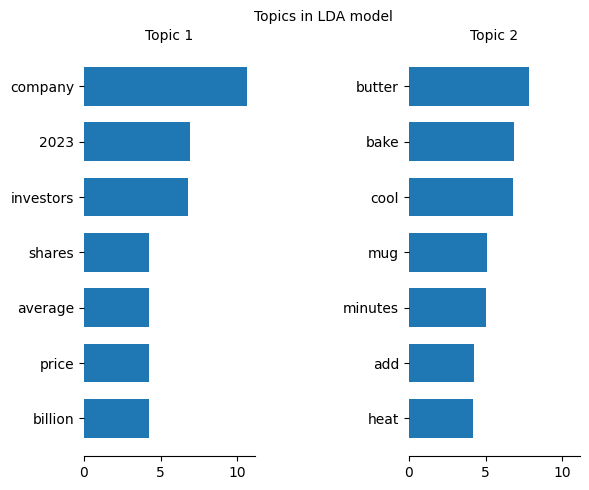

In [173]:
plot_top_words(lda, tf_vectorizer.get_feature_names_out(), 7, "Topics in LDA model")

In [16]:
# Save the model for later prediction

import pickle

model = (dic,
         lda.components_,
         lda.exp_dirichlet_component_,
         lda.doc_topic_prior_)

with open('lda_model', 'wb') as fp:
    pickle.dump(model, fp)